In [ ]:
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
data = read.csv('Baseline Investigation y100.csv')
head(data)

,daycount,shift,partnum,y100
,<int>,<int>,<int>,<dbl>
1,16,1,21637,-3.2
2,16,1,21641,-3.6
3,16,1,21689,0.4
4,16,1,21690,1.8
5,16,1,21697,-6.8
6,16,1,21698,-7.6


In [ ]:
# Initialize vectors for top 8 highest values and their partnums
top_8_y100 <- rep(-Inf, 8)  # Use -Inf as a placeholder for initialization
top_8_partnum <- rep(NA, 8)

# Initialize vectors for bottom 8 lowest values and their partnums
bottom_8_y100 <- rep(Inf, 8)  # Use Inf as a placeholder for initialization
bottom_8_partnum <- rep(NA, 8)

# Loop through the dataset to find top 8 highest y100 values
for (i in 1:nrow(data)) {
  current_y100 <- data$y100[i]
  current_partnum <- data$partnum[i]

  # For top 8 highest values
  if (current_y100 > min(top_8_y100)) {
    min_index <- which.min(top_8_y100)  # Find the index of the minimum value
    top_8_y100[min_index] <- current_y100  # Replace the minimum value with the current value
    top_8_partnum[min_index] <- current_partnum  # Update the corresponding partnum
  }

  # For bottom 8 lowest values
  if (current_y100 < max(bottom_8_y100)) {
    max_index <- which.max(bottom_8_y100)  # Find the index of the maximum value
    bottom_8_y100[max_index] <- current_y100  # Replace the maximum value with the current value
    bottom_8_partnum[max_index] <- current_partnum  # Update the corresponding partnum
  }
}

# Combine the results into data frames for easier viewing
top_8_results <- data.frame(partnum = top_8_partnum, y100 = top_8_y100)
bottom_8_results <- data.frame(partnum = bottom_8_partnum, y100 = bottom_8_y100)

# Print the results
print("Top 8 highest y100 values and respective partnum:")
print(top_8_results)
print("############")
print("Bottom 8 lowest y100 values and respective partnum:")
print(bottom_8_results)


[1] "Top 8 highest y100 values and respective partnum:"
  partnum y100
1   25177  7.8
2   27208  9.6
3   24742  8.0
4   24226  8.4
5   23809  7.8
6   27675  8.2
7   25299  8.0
8   22410  8.2
[1] "############"
[1] "Bottom 8 lowest y100 values and respective partnum:"
  partnum  y100
1   27127  -9.2
2   24810  -8.6
3   27897 -12.4
4   24252  -8.2
5   26035  -8.2
6   28147 -10.6
7   23106  -8.6
8   23193  -9.0


In [ ]:
# Sort top_8_results from largest to lowest y100 values
top_8_sorted <- top_8_results %>%
  arrange(desc(partnum))

# Print the sorted top 8 results
print("Top 8 highest y100 values sorted:")
print(top_8_sorted)

# Sort bottom_8_results from largest to lowest y100 values
bottom_8_sorted <- bottom_8_results %>%
  arrange(desc(partnum))

# Print the sorted bottom 8 results
print("Bottom 8 lowest y100 values sorted (from largest to lowest):")
print(bottom_8_sorted)


[1] "Top 8 highest y100 values sorted:"
  partnum y100
1   27675  8.2
2   27208  9.6
3   25299  8.0
4   25177  7.8
5   24742  8.0
6   24226  8.4
7   23809  7.8
8   22410  8.2
[1] "Bottom 8 lowest y100 values sorted (from largest to lowest):"
  partnum  y100
1   28147 -10.6
2   27897 -12.4
3   27127  -9.2
4   26035  -8.2
5   24810  -8.6
6   24252  -8.2
7   23193  -9.0
8   23106  -8.6


In [ ]:
# Define the dataframe
data_output <- data.frame(
  daycount = c(16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20),
  shift = c(2, 1, 1, 2, 3, 3, 1, 1, 2, 2, 1, 3, 3, 1, 2, 2),
  partnum = c(22410, 23106, 23193, 23809, 24226, 24252, 24742, 24810, 25177, 25299, 26035, 27127, 27208, 27675, 27897, 28147),
  y100 = c(8.2, -8.6, -9, 7.8, 8.4, -8.2, 8, -8.6, 7.8, 8, -8.2, -9.2, 9.6, 8.2, -12.4, -10.6),
  x10 = c(1.8, 4.6, 1.6, 3.2, 1.5, 3.8, 3.3, 5.4, 5.6, 4.8, 0.2, 6.2, 4.1, 3.6, 4.2, 2),
  x11 = c(11.8, 0.5, 7.2, -0.4, 8.5, 3.1, 0.5, 0.5, 3.2, -1.2, 11, 4.1, -0.8, 7.9, 1.9, 5.4),
  x12 = c(16.8, 1.4, -1.7, 8.4, 13.2, 3.3, 14.5, -2.4, 15.5, 9.9, 1.8, 4.6, 14.4, 6.7, 0.4, -0.4)
)

# Display the first few rows of the dataframe
head(data_output)


,daycount,shift,partnum,y100,x10,x11,x12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,2,22410,8.2,1.8,11.8,16.8
2,17,1,23106,-8.6,4.6,0.5,1.4
3,17,1,23193,-9.0,1.6,7.2,-1.7
4,17,2,23809,7.8,3.2,-0.4,8.4
5,17,3,24226,8.4,1.5,8.5,13.2
6,17,3,24252,-8.2,3.8,3.1,3.3


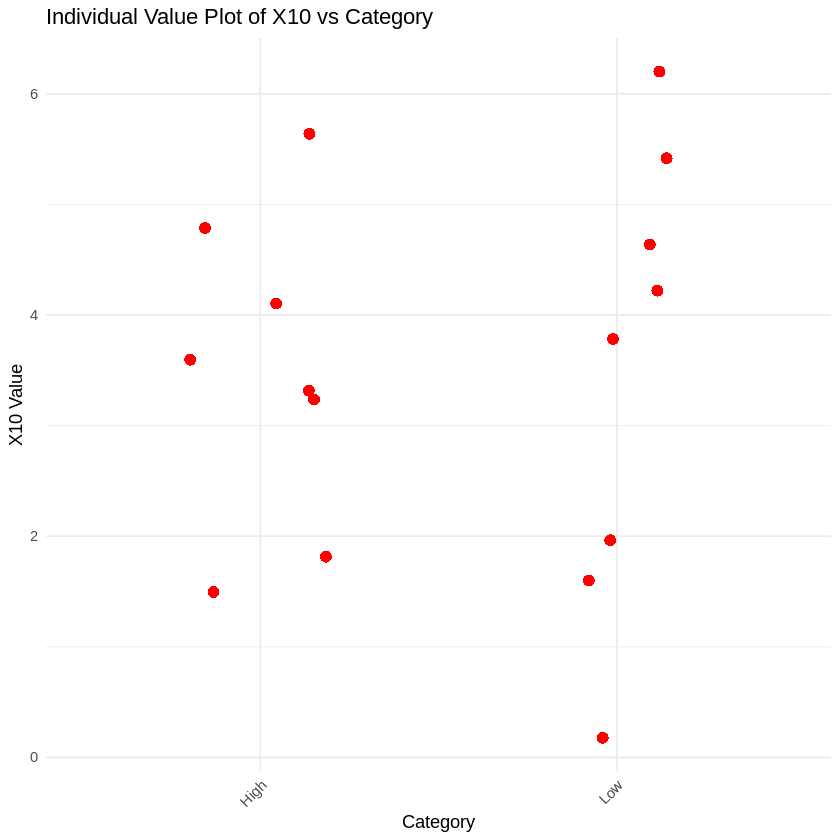

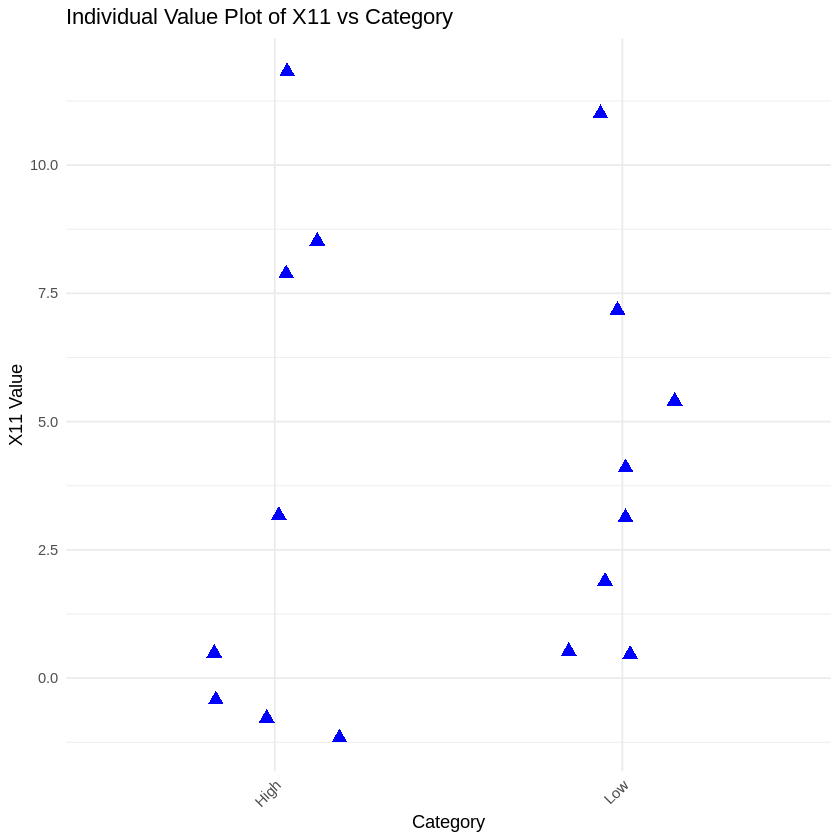

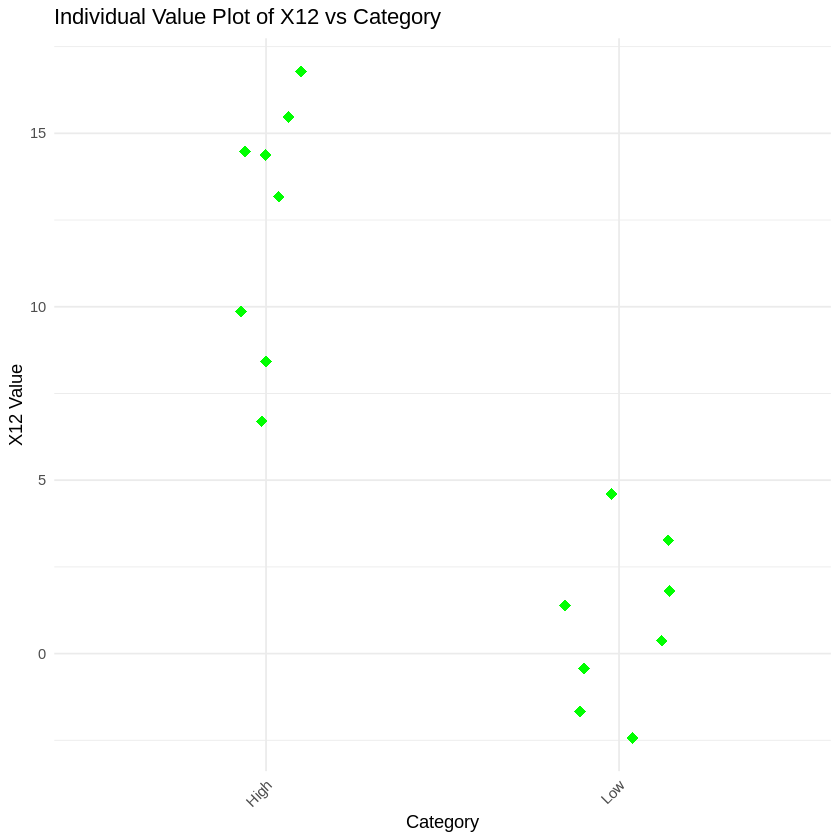

In [ ]:
# Categorize partnum into "Low" and "High"
data_output$category <- ifelse(data_output$partnum %in% c(27675, 27208, 25299, 25177, 24742, 24226, 23809, 22410), "High", "Low")


# Create the scatter plot
ggplot(data_output, aes(x = category, y = x10)) +
  geom_jitter(width = 0.2, size = 3, shape = 16, color = "red") + # geom_jitter to avoid overplotting
  labs(title = "Individual Value Plot of X10 vs Category", x = "Category", y = "X10 Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # If you have more categories and want to angle the x labels

# Create the scatter plot for x2 with blue triangles
ggplot(data_output, aes(x = category, y = x11)) +
  geom_jitter(width = 0.2, size = 3, shape = 17, color = "blue") + # Blue triangles
  labs(title = "Individual Value Plot of X11 vs Category", x = "Category", y = "X11 Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Angled x labels

# Create the scatter plot for x3 with green diamonds
ggplot(data_output, aes(x = category, y = x12)) +
  geom_jitter(width = 0.2, size = 3, shape = 18, color = "green") + # Green diamonds
  labs(title = "Individual Value Plot of X12 vs Category", x = "Category", y = "X12 Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Angled x labels



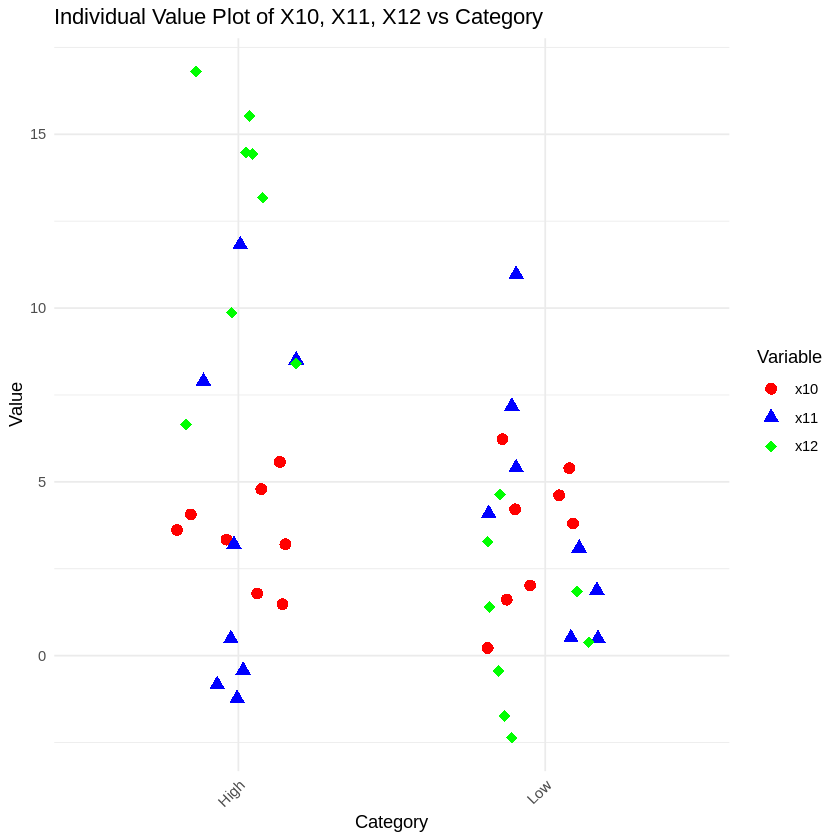

In [ ]:
# Categorize partnum into "Low" and "High"
data_output$category <- ifelse(data_output$partnum %in% c(27675, 27208, 25299, 25177, 24742, 24226, 23809, 22410), "High", "Low")

# Reshape the data to long format
data_long <- gather(data_output, key = "variable", value = "value", x10, x11, x12)

# Create the scatter plot with different shapes and colors for x1, x2, and x3
ggplot(data_long, aes(x = category, y = value, shape = variable, color = variable)) +
  geom_jitter(width = 0.2, size = 3) +
  labs(title = "Individual Value Plot of X10, X11, X12 vs Category", x = "Category", y = "Value") +
  scale_shape_manual(values = c(16, 17, 18)) + # Different shapes for x1, x2, x3
  scale_color_manual(values = c("red", "blue", "green")) + # Different colors for x1, x2, x3
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(shape = guide_legend(title = "Variable"), color = guide_legend(title = "Variable"))

ERROR: Error in eval(expr, envir, enclos): object 'ggplot_object' not found


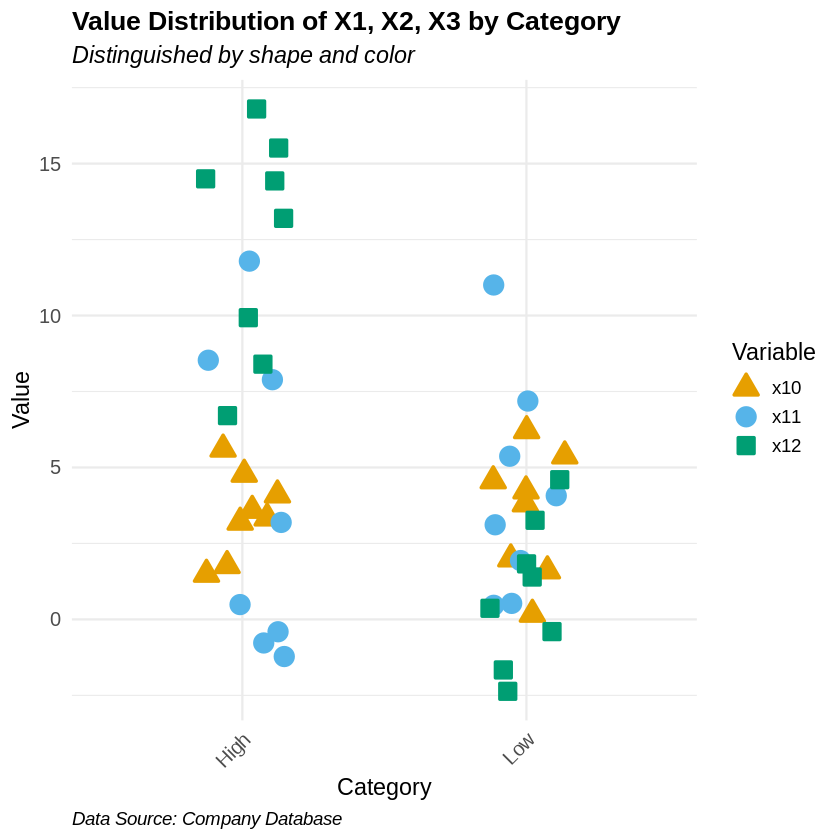

In [ ]:
# Load necessary libraries
library(ggplot2)
library(tidyr)

# Categorize partnum into "Low" and "High"
data_output$category <- ifelse(data_output$partnum %in% c(27675, 27208, 25299, 25177, 24742, 24226, 23809, 22410), "High", "Low")

# Reshape the data to long format
data_long <- gather(data_output, key = "variable", value = "value", x10, x11, x12)

# Create the scatter plot with different filled shapes for x1, x2, and x3
ggplot(data_long, aes(x = category, y = value, shape = variable, color = variable, fill = variable)) +
  geom_point(size = 4, position = position_jitter(width = 0.15), stroke = 1.5) +
  scale_shape_manual(values = c(24, 21, 22)) + # Triangle, Circle, Square
  scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73")) + # Colors that are colorblind-friendly
  scale_fill_manual(values = c("#E69F00", "#56B4E9", "#009E73")) + # Same colors for fill
  labs(title = "Value Distribution of X1, X2, X3 by Category",
       subtitle = "Distinguished by shape and color",
       x = "Category",
       y = "Value",
       caption = "Data Source: Company Database") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(face = "italic"),
    legend.position = "right",
    legend.title.align = 0.5,
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    plot.caption = element_text(hjust = 0, face = "italic"),
    legend.background = element_rect(fill = "white", color = NA),
    legend.key = element_rect(fill = "white", color = NA)
  ) +
  guides(shape = guide_legend(title = "Variable"), color = guide_legend(title = "Variable"), fill = guide_legend(title = "Variable"))

# Print the plot
print(ggplot_object)



In [ ]:
df = read.csv('Input_Output Investigation data.csv') # Input / Output Investigation Data
head(df)

,daycount,shift,partnum,y100,x10,x11,x12
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,25,3,35538,-7.8,2.3,7.1,-2.6
2,25,3,35542,-6.2,2.8,10.6,3.4
3,25,3,35549,2.6,5.9,-3.6,14.4
4,25,3,35553,-3.8,3.6,2.2,0.0
5,25,3,35556,2.6,2.6,8.6,10.1
6,25,3,35573,3.0,1.8,4.9,8.5


In [ ]:
model <- lm(y100 ~ x10 + x11 + x12 + x10*x11*x12 , data=df)
summary(model)


Call:
lm(formula = y100 ~ x10 + x11 + x12 + x10 * x11 * x12, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7452  -1.9722   0.0741   2.0391   9.4356 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.0992447  1.1063533  -5.513 5.58e-08 ***
x10          0.4837679  0.2554820   1.894   0.0588 .  
x11          0.1580866  0.1195551   1.322   0.1867    
x12          0.9415486  0.1631242   5.772 1.35e-08 ***
x10:x11     -0.0152253  0.0303403  -0.502   0.6160    
x10:x12     -0.0359921  0.0375911  -0.957   0.3388    
x11:x12     -0.0184302  0.0167759  -1.099   0.2724    
x10:x11:x12  0.0008494  0.0041820   0.203   0.8391    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.01 on 517 degrees of freedom
Multiple R-squared:  0.5029,	Adjusted R-squared:  0.4962 
F-statistic: 74.72 on 7 and 517 DF,  p-value: < 2.2e-16


In [ ]:
model <- lm(y100 ~ x10 + x11 + x12, data=df)
summary(model)


Call:
lm(formula = y100 ~ x10 + x11 + x12, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1426  -2.0078   0.1788   2.0120   9.1127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.86166    0.58706  -8.281 1.03e-15 ***
x10          0.23380    0.12974   1.802   0.0721 .  
x11          0.01872    0.04177   0.448   0.6542    
x12          0.75696    0.03331  22.724  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.005 on 521 degrees of freedom
Multiple R-squared:  0.5006,	Adjusted R-squared:  0.4977 
F-statistic: 174.1 on 3 and 521 DF,  p-value: < 2.2e-16


In [ ]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x10,1,3.057593e+01,3.057593e+01,3.375307e+00,6.675400e-02
x11,1,2.287831e+01,2.287831e+01,2.525559e+00,1.126264e-01
x12,1,4.663011e+03,4.663011e+03,5.147544e+02,1.327259e-79
x10:x11,1,3.097162e+00,3.097162e+00,3.418988e-01,5.589903e-01
x10:x12,1,3.018399e-02,3.018399e-02,3.332041e-03,9.539909e-01
x11:x12,1,1.786700e+01,1.786700e+01,1.972356e+00,1.607985e-01
x10:x11:x12,1,3.736747e-01,3.736747e-01,4.125033e-02,8.391354e-01
Residuals,517,4.683353e+03,9.058709e+00,NA,NA


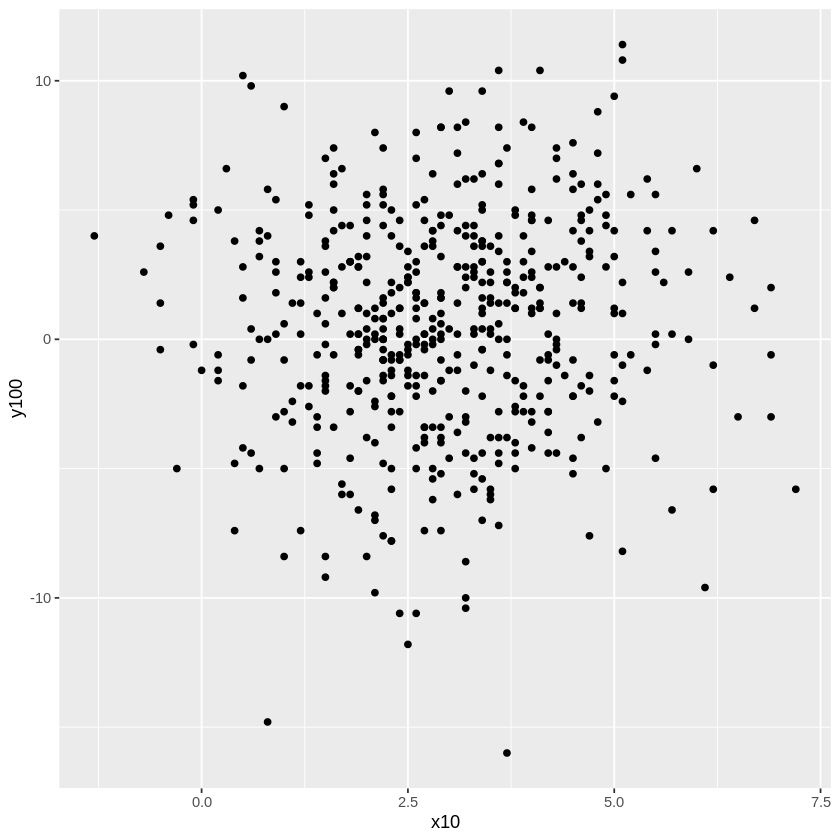

In [ ]:
df %>% ggplot(aes(y = y100, x = `x10`))+geom_point()

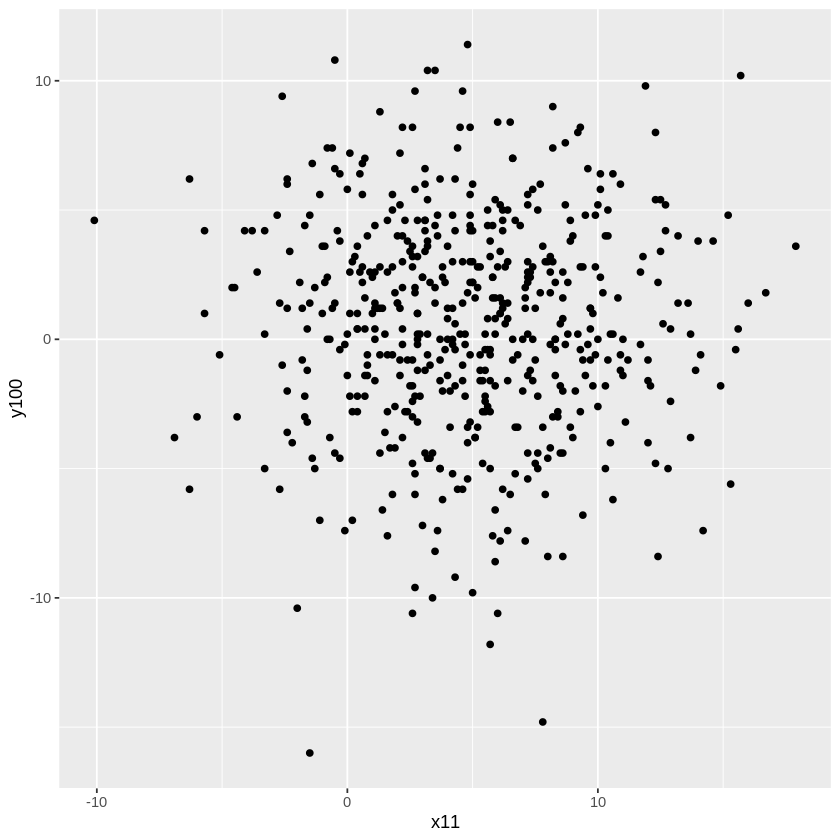

In [ ]:
df %>% ggplot(aes(y = y100, x = `x11`))+geom_point()

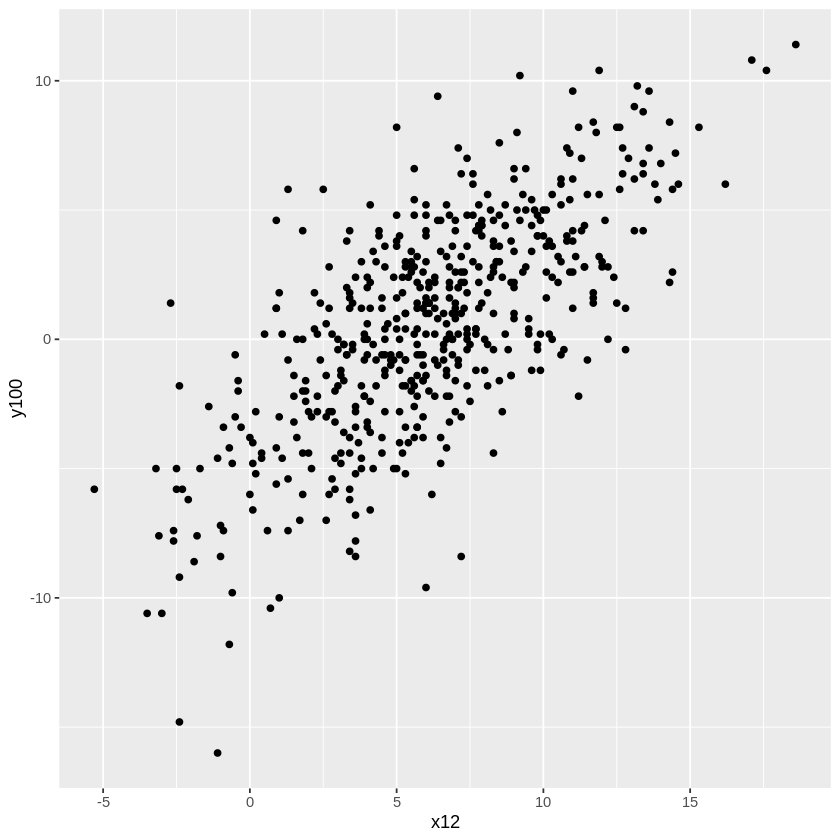

In [ ]:
df %>% ggplot(aes(y = y100, x = `x12`))+geom_point()

In [ ]:
summary(df$y100)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-16.0000  -2.0000   0.8000   0.5535   3.4000  11.4000 

In [ ]:
mean(df$y100)
sd(df$y100)

[1] 0.5535238

[1] 4.240208

In [ ]:
# From Baseline Investigation, SD = 4.28 Mean = -0.005

# if Res SD <<< Baseline SD : One or More Suspects is a dominant cause